# Covid-19 Analysis #

***
This notebook contains my analysis of the Covid-19 vaccination program.

# Dataset Overview #

fdhbdzbd

In [2]:
# Load the weekly vaccinations dataset

import pandas as pd

df = pd.read_csv('covid_weekly_vaccine.csv') # https://covid19ireland-geohive.hub.arcgis.com/datasets/0101ed10351e42968535bb002f94c8c6_0/explore?location=53.510274%2C-7.920586%2C7.88

# Let's have a look at the data
df.head()

,X,Y,ExtractDate,Week,TotalweeklyVaccines,Male,Female,NA,Moderna,Pfizer,...,FullyPer_Age10to19,FullyPer_Age20to29,FullyPer_Age30to39,FullyPer_Age40to49,FullyPer_Age50to59,FullyPer_Age60to69,FullyPer_Age70to79,FullyPer_80_,FullyPer_NA,ObjectId
0,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2020-W53,4076,1304,2772,0,10,4052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W01,44220,11846,32374,0,28,44148,...,0.000004,0.000018,0.000042,0.000011,0.000011,0.000010,0.000009,0.000049,NaN,2
2,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W02,53145,14057,39088,0,1946,51118,...,0.000004,0.000032,0.000079,0.000023,0.000020,0.000018,0.000014,0.000060,NaN,3
3,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W03,50222,14964,35258,0,51,50000,...,0.000004,0.000669,0.001511,0.001108,0.001237,0.000756,0.000086,0.000125,NaN,4
4,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W04,51949,15066,36883,0,35,51652,...,0.000007,0.007608,0.015900,0.015613,0.017585,0.011731,0.001500,0.004408,inf,5


In [3]:
# Convert the 'week' column to a proper date (first day of the ISO week)
df['Date'] = pd.to_datetime(df['Week'] + '-1', format='%G-W%V-%u')

# Check the first few rows
df[['Week', 'Date']].head()

,Week,Date
0,2020-W53,2020-12-28
1,2021-W01,2021-01-04
2,2021-W02,2021-01-11
3,2021-W03,2021-01-18
4,2021-W04,2021-01-25


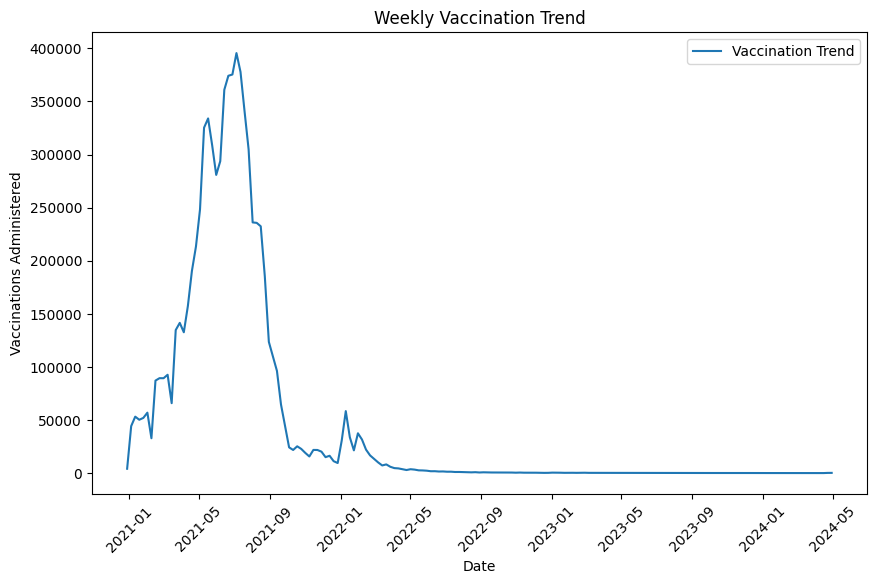

In [4]:
import matplotlib.pyplot as plt

# Assuming the vaccination count column is named 'Vaccination_Count' (replace if necessary)
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['TotalweeklyVaccines'], label='Vaccination Trend')
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [5]:
import pandas as pd

# Convert the ISO week to the first day of that week (Monday)
end_date = pd.to_datetime('2022-W26-1', format='%G-W%V-%u')  # The first day of '2022-W26'

print(end_date)

2022-06-27 00:00:00


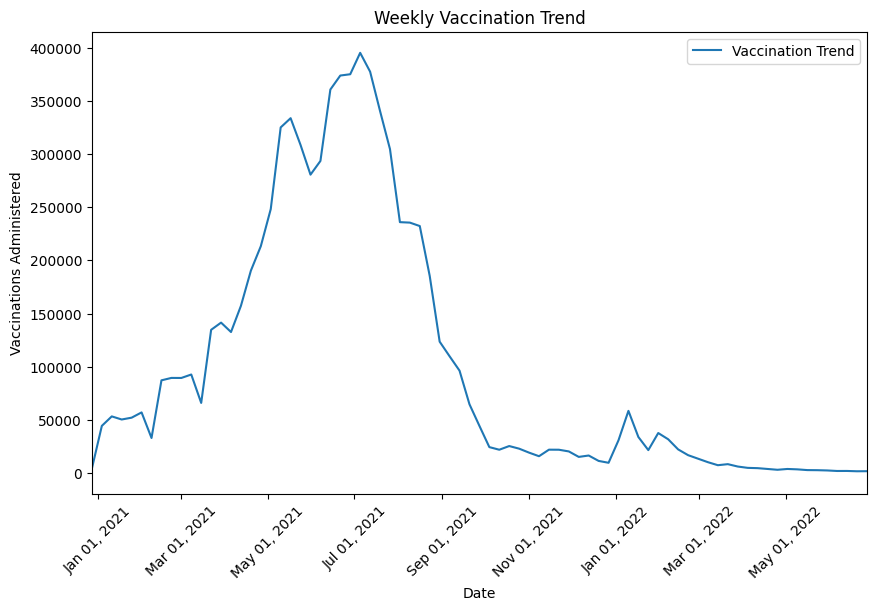

In [6]:
import matplotlib.pyplot as plt

# Plot vaccination trend
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['TotalweeklyVaccines'], label='Vaccination Trend')

# Set x-axis limits (start from the first date in the data to '2022-W26')
plt.xlim(df['Date'].min(), end_date)

# Format x-axis date labels and rotate them
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend')

# Display legend
plt.legend()

# Show plot
plt.show()

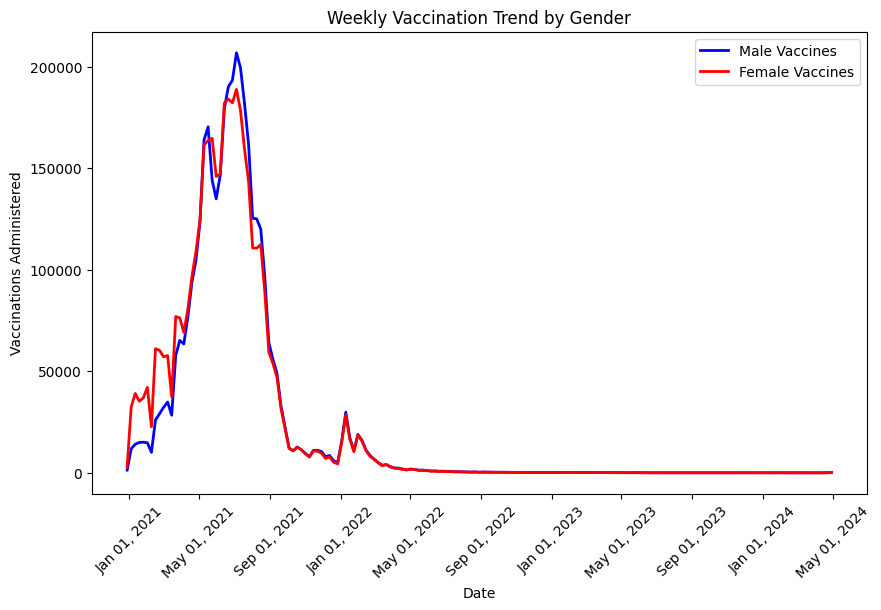

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make sure you have the correct column names for male and female vaccine counts
# Example column names: 'Male_Vaccines' and 'Female_Vaccines'

plt.figure(figsize=(10, 6))

# Plot male vaccination trend
plt.plot(df['Date'], df['Male'], label='Male Vaccines', color='blue', linestyle='-', linewidth=2)

# Plot female vaccination trend
plt.plot(df['Date'], df['Female'], label='Female Vaccines', color='red', linestyle='-', linewidth=2)

# Format x-axis to show dates better
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend by Gender')

# Show legend
plt.legend()

# Display the plot
plt.show()

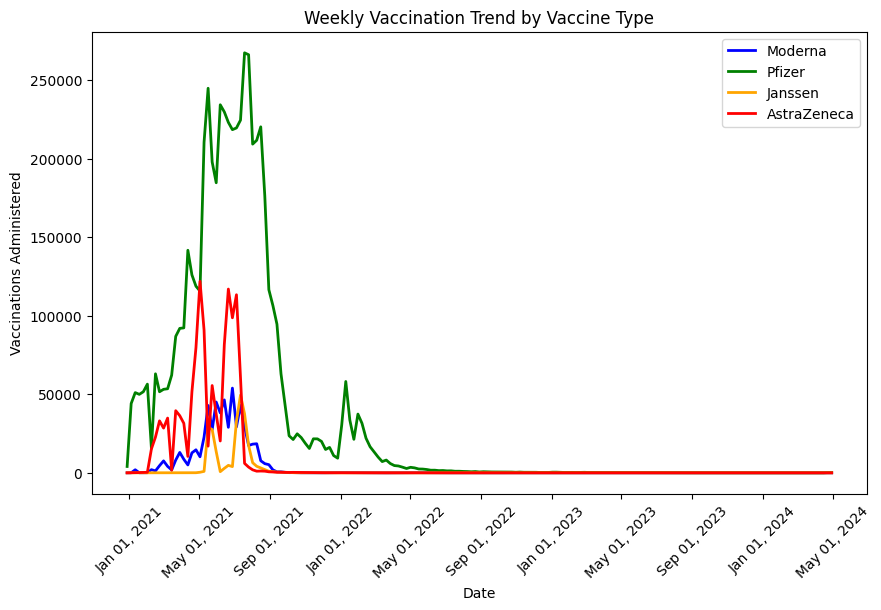

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting the vaccination trend for different vaccine types
plt.figure(figsize=(10, 6))

# Plot Moderna vaccinations
plt.plot(df['Date'], df['Moderna'], label='Moderna', color='blue', linestyle='-', linewidth=2)

# Plot Pfizer vaccinations
plt.plot(df['Date'], df['Pfizer'], label='Pfizer', color='green', linestyle='-', linewidth=2)

# Plot Janssen vaccinations
plt.plot(df['Date'], df['Janssen'], label='Janssen', color='orange', linestyle='-', linewidth=2)

# Plot AstraZeneca vaccinations
plt.plot(df['Date'], df['AstraZeneca'], label='AstraZeneca', color='red', linestyle='-', linewidth=2)

# Format x-axis to show dates better
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend by Vaccine Type')

# Show legend
plt.legend()

# Display the plot
plt.show()

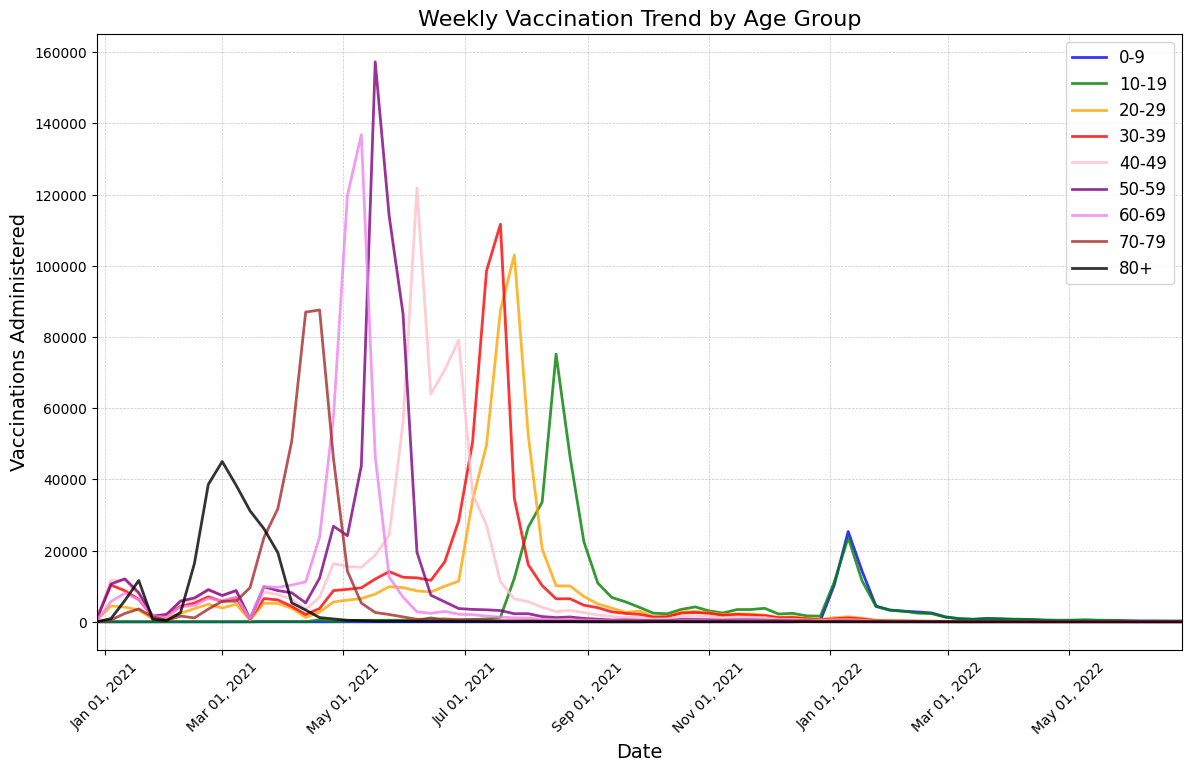

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Adjust the figure size for better clarity
plt.figure(figsize=(14, 8))

# Plot vaccination trends for each age group with slight opacity
plt.plot(df['Date'], df['Partial_Age0to9'], label='0-9', color='blue', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(df['Date'], df['Partial_Age10to19'], label='10-19', color='green', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(df['Date'], df['Partial_Age20to29'], label='20-29', color='orange', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(df['Date'], df['Partial_Age30to39'], label='30-39', color='red', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(df['Date'], df['Partial_Age40to49'], label='40-49', color='pink', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(df['Date'], df['Partial_Age50to59'], label='50-59', color='purple', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(df['Date'], df['Partial_Age60to69'], label='60-69', color='violet', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(df['Date'], df['Partial_Age70to79'], label='70-79', color='brown', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(df['Date'], df['Partial_Age80_'], label='80+', color='black', linestyle='-', linewidth=2, alpha=0.8)

# Set x-axis limits
plt.xlim(df['Date'].min(), end_date)

# Format x-axis date labels and rotate them
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.xticks(rotation=45)

# Add gridlines for better visual clarity
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title with larger font size for readability
plt.xlabel('Date', fontsize=14)
plt.ylabel('Vaccinations Administered', fontsize=14)
plt.title('Weekly Vaccination Trend by Age Group', fontsize=16)

# Show legend with larger font size
plt.legend(fontsize=12)

# Display the plot
plt.show()